In [1]:
%%capture

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
!pip install scikit-learn
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [2]:
outputs_path = '/home/firedrake/H3F/rift_id/outputs'
area_path = '/home/firedrake/H3F/rift_id/area'
shapefiles_path = '/home/firedrake/H3F/rift_id/shapefiles'
sliderule_path = '/home/firedrake/H3F/rift_id/sliderule'

### Rifts 0

In [3]:
dml_all_bin_lr = pd.read_pickle(outputs_path + '/dml_all_bin_lr.pkl')
dml_all_bin_lr_h = np.array(dml_all_bin_lr["h_subset"].to_list())
dml_all_bin_lr_0 = np.zeros(len(dml_all_bin_lr_h))

In [4]:
print(len(dml_all_bin_lr_h))

88


In [5]:
dml_all_bin_lr_h_scaled = {
    "scaled": []
}

for ri in range(0,len(dml_all_bin_lr_h)):
    temp_h = dml_all_bin_lr_h[ri]
    
    if np.min(temp_h) < 0:
        temp_h = temp_h - np.min(temp_h)
        
    temp_h = temp_h / np.max(temp_h)
    
    dml_all_bin_lr_h_scaled["scaled"].append(temp_h)

In [6]:
dml_all_bin_lr_h = np.array(pd.DataFrame(dml_all_bin_lr_h_scaled["scaled"]))
print(len(dml_all_bin_lr_h))

88


### non-rifted ice

In [7]:
dml_all_bin_lr_nonrift = pd.read_pickle(outputs_path + '/dml_all_bin_lr_nonrift.pkl')
dml_all_bin_lr_nonrift_h = np.array(dml_all_bin_lr_nonrift["h_subset"].to_list())
dml_all_bin_lr_nonrift_1 = np.ones(len(dml_all_bin_lr_nonrift_h))

In [8]:
print(len(dml_all_bin_lr_nonrift_h))

1021


In [9]:
dml_all_bin_lr_nonrift_h_scaled = {
    "scaled": []
}

for nr in range(0,len(dml_all_bin_lr_nonrift_h)):
    temp_h = dml_all_bin_lr_nonrift_h[nr]
    
    if np.min(temp_h) < 0:
        temp_h = temp_h - np.min(temp_h)
        
    temp_h = temp_h / np.max(temp_h)
    
    dml_all_bin_lr_nonrift_h_scaled["scaled"].append(temp_h)

In [10]:
dml_all_bin_lr_nonrift_h = np.array(pd.DataFrame(dml_all_bin_lr_nonrift_h_scaled["scaled"]))
print(len(dml_all_bin_lr_nonrift_h))

1021


In [11]:
test_sz = 0.2

In [12]:
print((len(dml_all_bin_lr_nonrift_h) +\
       len(dml_all_bin_lr_h)) * test_sz)

221.8


### Concatenate

In [13]:
# rift nonrift
dml_all_bin_lr_h_rift_nonrift_ocean_cf_gl = np.concatenate([dml_all_bin_lr_h,dml_all_bin_lr_nonrift_h])
dml_all_bin_lr_01 = np.concatenate([dml_all_bin_lr_0,dml_all_bin_lr_nonrift_1])


In [14]:
digits = {
    'data': dml_all_bin_lr_h_rift_nonrift_ocean_cf_gl,
    'target': dml_all_bin_lr_01
}

### Random Forest

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(digits['data'], digits['target'], test_size=test_sz, random_state=0)


In [16]:
model = RandomForestClassifier(n_estimators=40)
model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=40)

In [17]:
model.score(X_test,Y_test)

1.0

In [18]:
Y_predicted = model.predict(X_test)

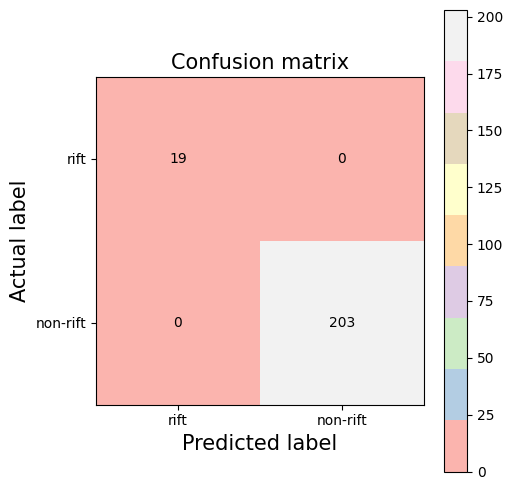

In [19]:
cm = metrics.confusion_matrix(Y_test, Y_predicted)

plt.figure(figsize=(5,5))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["rift", "non-rift"], size=10)
plt.yticks(tick_marks, ["rift", "non-rift"], size=10)
plt.tight_layout()
plt.ylabel('Actual label', size=15)
plt.xlabel('Predicted label', size=15)
width, height = cm.shape

for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy=(y, x),
                     horizontalalignment='center',
                     verticalalignment='center')

plt.show()

### new stuff

In [20]:
# load study shelf shapefiles
all_shelf_outline_path = shapefiles_path + '/USNIC_ANTARC_shelf_2022_epsg3031.shp'
all_shelf_outline = gpd.read_file(all_shelf_outline_path)
study_shelf_outline = all_shelf_outline[all_shelf_outline['OBJECTID']==591009]
study_area_outline_path = area_path + '/box_dml_test.shp'    
study_area_outline = gpd.read_file(study_area_outline_path)

# define study area bounding box in polar stereographic
study_area_xmin = study_area_outline.bounds.minx[0]
study_area_xmax = study_area_outline.bounds.maxx[0]
study_area_ymin = study_area_outline.bounds.miny[0]
study_area_ymax = study_area_outline.bounds.maxy[0]

# calculate of study area center and buffer for plot
distbuffer = 1.1*(np.max([study_area_xmax-study_area_xmin, study_area_ymax-study_area_ymin])/2)
centerx = np.mean([study_area_xmax,study_area_xmin])
centery = np.mean([study_area_ymax,study_area_ymin])

In [21]:
# load pickle
pickle_path = sliderule_path + '/sliderule_study_area_dml_cycle11.pkl'
atl06_data = pd.read_pickle(pickle_path)
display(atl06_data)

,time,x,y,x_atc,lat,lon,h,geoid,tides,quality,h_sig,cycle,rgt,beam
0,2021-03-26 08:37:40.866860800,"[-50307.758468295266, -50417.17602568305, -504...","[2280552.5910639, 2279436.966040412, 2279018.6...","[27792025.250218205, 27793140.25905701, 277935...","[-69.22685300342985, -69.23677604872877, -69.2...","[-1.2637089961745078, -1.2670762633495432, -1....","[7.756271788845216, 7.846335847787395, 7.82124...","[9.930870594039048, 9.96271925853081, 9.974860...","[-0.40758735, -0.4081091, -0.40830496, -0.4083...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.04945055964167696, 0.05993237956888113, 0.0...",11,23,1l
1,2021-03-26 08:37:41.037712896,"[-50270.37389738817, -50272.28099091074, -5027...","[2281896.599394636, 2281876.6715516583, 228185...","[27790691.220701646, 27790711.13159864, 277907...","[-69.21488036232438, -69.21505761399084, -69.2...","[-1.2620267010818258, -1.2620855810116396, -1....","[7.827887620301715, 7.764304595789732, 7.53754...","[9.900398279187032, 9.900977043541143, 9.90155...","[-0.40696156, -0.40697244, -0.40698165, -0.406...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.022528522187709298, 0.03790892993093624, 0....",11,23,1r
2,2021-03-26 08:37:40.908867072,"[-53711.1639973591, -53713.11004549511, -53732...","[2280464.935684791, 2280445.0114185195, 228024...","[27792443.37862945, 27792463.28950328, 2779266...","[-69.22694247001449, -69.227119656176, -69.228...","[-1.349222302779825, -1.3492829535957724, -1.3...","[7.741097769470653, 7.571254694051456, 7.64603...","[9.908589646330592, 9.908968671174659, 9.91275...","[-0.40531406, -0.40532398, -0.40542534, -0.405...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.04506707100265365, 0.032580432003668294, 0....",11,23,2l
3,2021-03-26 08:37:40.956063232,"[-53589.613995411084, -53591.62877258, -53593....","[2282685.8798110597, 2282665.960965646, 228264...","[27790233.269998103, 27790253.180901155, 27790...","[-69.20717217613138, -69.20734929044116, -69.2...","[-1.3448608185499442, -1.344923093484284, -1.3...","[8.17014113138064, 7.544810781911221, 7.496389...","[9.843527465714098, 9.84410488330482, 9.844682...","[-0.4042947, -0.40430394, -0.40431347, -0.4043...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.05014263284345887, 0.0720250625494654, 0.04...",11,23,2r
4,2021-03-26 08:37:40.748591616,"[-56979.40999984719, -57079.34103105208, -5725...","[2281812.053972535, 2280795.889419774, 2279002...","[27791427.923715092, 27792443.37862945, 277942...","[-69.21422862591847, -69.22326338248112, -69.2...","[-1.4304426996636184, -1.4335885356099416, -1....","[8.45054137761454, 7.198120860542157, 8.536495...","[9.835844280825482, 9.865329907096257, 9.90736...","[-0.40238, -0.4028587, -0.40368843, -0.4038725...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.037006679403575965, 0.0386426366109769, 0.0...",11,23,3l
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2021-06-21 17:10:23.621510656,"[-27705.687082902128, -27722.773092419804, -27...","[1980397.4283239353, 1980515.3219632423, 19806...","[32119411.161456596, 32119530.605531752, 32119...","[-71.91686256593705, -71.91580122752377, -71.9...","[-0.801513557379469, -0.8019600490284113, -0.8...","[221.95405743901227, 219.94191056138416, 216.7...","[10.743829387512937, 10.743316807227407, 10.74...","[3.4028235e+38, 3.4028235e+38, 3.4028235e+38, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.05615161721348499, 0.09234015933423258, 0.0...",11,1357,1r
376,2021-06-21 17:10:31.826208000,"[-33262.65410015448, -33265.520534259165, -332...","[2040735.082718131, 2040754.7616163464, 204083...","[32180030.12571454, 32180050.033784337, 321801...","[-71.37442087432981, -71.37424392022105, -71.3...","[-0.9338012400493081, -0.9338726930382525, -0....","[260.6444024704661, 260.45351921299726, 259.42...","[11.794150226722147, 11.794880053968672, 11.79...","[3.4028235e+38, 3.4028235e+38, 3.4028235e+38, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","

In [22]:
atl06_data_sub = atl06_data
display(atl06_data_sub)
print(len(atl06_data_sub["h"].iloc[0]))

,time,x,y,x_atc,lat,lon,h,geoid,tides,quality,h_sig,cycle,rgt,beam
0,2021-03-26 08:37:40.866860800,"[-50307.758468295266, -50417.17602568305, -504...","[2280552.5910639, 2279436.966040412, 2279018.6...","[27792025.250218205, 27793140.25905701, 277935...","[-69.22685300342985, -69.23677604872877, -69.2...","[-1.2637089961745078, -1.2670762633495432, -1....","[7.756271788845216, 7.846335847787395, 7.82124...","[9.930870594039048, 9.96271925853081, 9.974860...","[-0.40758735, -0.4081091, -0.40830496, -0.4083...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.04945055964167696, 0.05993237956888113, 0.0...",11,23,1l
1,2021-03-26 08:37:41.037712896,"[-50270.37389738817, -50272.28099091074, -5027...","[2281896.599394636, 2281876.6715516583, 228185...","[27790691.220701646, 27790711.13159864, 277907...","[-69.21488036232438, -69.21505761399084, -69.2...","[-1.2620267010818258, -1.2620855810116396, -1....","[7.827887620301715, 7.764304595789732, 7.53754...","[9.900398279187032, 9.900977043541143, 9.90155...","[-0.40696156, -0.40697244, -0.40698165, -0.406...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.022528522187709298, 0.03790892993093624, 0....",11,23,1r
2,2021-03-26 08:37:40.908867072,"[-53711.1639973591, -53713.11004549511, -53732...","[2280464.935684791, 2280445.0114185195, 228024...","[27792443.37862945, 27792463.28950328, 2779266...","[-69.22694247001449, -69.227119656176, -69.228...","[-1.349222302779825, -1.3492829535957724, -1.3...","[7.741097769470653, 7.571254694051456, 7.64603...","[9.908589646330592, 9.908968671174659, 9.91275...","[-0.40531406, -0.40532398, -0.40542534, -0.405...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.04506707100265365, 0.032580432003668294, 0....",11,23,2l
3,2021-03-26 08:37:40.956063232,"[-53589.613995411084, -53591.62877258, -53593....","[2282685.8798110597, 2282665.960965646, 228264...","[27790233.269998103, 27790253.180901155, 27790...","[-69.20717217613138, -69.20734929044116, -69.2...","[-1.3448608185499442, -1.344923093484284, -1.3...","[8.17014113138064, 7.544810781911221, 7.496389...","[9.843527465714098, 9.84410488330482, 9.844682...","[-0.4042947, -0.40430394, -0.40431347, -0.4043...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.05014263284345887, 0.0720250625494654, 0.04...",11,23,2r
4,2021-03-26 08:37:40.748591616,"[-56979.40999984719, -57079.34103105208, -5725...","[2281812.053972535, 2280795.889419774, 2279002...","[27791427.923715092, 27792443.37862945, 277942...","[-69.21422862591847, -69.22326338248112, -69.2...","[-1.4304426996636184, -1.4335885356099416, -1....","[8.45054137761454, 7.198120860542157, 8.536495...","[9.835844280825482, 9.865329907096257, 9.90736...","[-0.40238, -0.4028587, -0.40368843, -0.4038725...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.037006679403575965, 0.0386426366109769, 0.0...",11,23,3l
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2021-06-21 17:10:23.621510656,"[-27705.687082902128, -27722.773092419804, -27...","[1980397.4283239353, 1980515.3219632423, 19806...","[32119411.161456596, 32119530.605531752, 32119...","[-71.91686256593705, -71.91580122752377, -71.9...","[-0.801513557379469, -0.8019600490284113, -0.8...","[221.95405743901227, 219.94191056138416, 216.7...","[10.743829387512937, 10.743316807227407, 10.74...","[3.4028235e+38, 3.4028235e+38, 3.4028235e+38, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.05615161721348499, 0.09234015933423258, 0.0...",11,1357,1r
376,2021-06-21 17:10:31.826208000,"[-33262.65410015448, -33265.520534259165, -332...","[2040735.082718131, 2040754.7616163464, 204083...","[32180030.12571454, 32180050.033784337, 321801...","[-71.37442087432981, -71.37424392022105, -71.3...","[-0.9338012400493081, -0.9338726930382525, -0....","[260.6444024704661, 260.45351921299726, 259.42...","[11.794150226722147, 11.794880053968672, 11.79...","[3.4028235e+38, 3.4028235e+38, 3.4028235e+38, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","

1265


In [23]:
bin_array = {
    "cycle": [],
    "rgt":   [],
    "beam":  [],
    "x_mid": [],
    "y_mid": [],
    "d_mid": [],
    "x_min": [],
    "y_min": [],
    "d_min": [],
    "bin":   []
}

for trace in range(121,122): #0,len(atl06_data_sub)):
    h_fb = atl06_data_sub["h"].iloc[trace] - atl06_data_sub["geoid"].iloc[trace]
    x = atl06_data_sub["x"].iloc[trace]
    y = atl06_data_sub["y"].iloc[trace]
    d = np.sqrt(x**2 + y**2)

    quality = atl06_data_sub["quality"].iloc[trace]
    
    #remove poor quality here if needed

    cycle = atl06_data_sub["cycle"].iloc[trace]
    rgt   = atl06_data_sub["rgt"].iloc[trace]
    beam  = atl06_data_sub["beam"].iloc[trace]
    
    if cycle < 10:
        cycle_str = '0'+str(cycle)
    else:
        cycle_str = str(cycle)

    if len(h_fb) >= 501:
        print("cycle: "+cycle_str+" rgt: "+str(rgt)+" beam: "+beam+" number_points: "+str(len(h_fb))+" (quality: "+str(np.sum(quality))+")")
        
        x_mid_trace = []
        y_mid_trace = []
        d_mid_trace = []
        x_min_trace = []
        y_min_trace = []
        d_min_trace = []
        bin_trace   = []
        
        n_tot = 0
        n_yes = 0
        
        
        for segment in range(251,len(h_fb)-250):
            n_tot += 1

            h_fb_sub = h_fb[segment-251:segment+250]
            h_fb_sub_scale = h_fb[segment-251:segment+250]
            x_sub    = x[segment-251:segment+250]
            y_sub    = y[segment-251:segment+250]
            d_sub    = d[segment-251:segment+250]
            
            d_sub_len = np.max(d_sub) - np.min(d_sub)
            d_sub_mid = np.mean((np.max(d_sub),np.min(d_sub)))
            x_sub_mid = np.mean((np.max(x_sub),np.min(x_sub)))
            y_sub_mid = np.mean((np.max(y_sub),np.min(y_sub)))
            
            trace_min_loc = np.where(h_fb_sub_scale == np.min(h_fb_sub_scale))
            d_sub_min = d_sub[trace_min_loc][0]
            x_sub_min = x_sub[trace_min_loc][0]
            y_sub_min = y_sub[trace_min_loc][0]
    
            if ((len(h_fb_sub_scale)==501) & (d_sub_len < 12000)):
                n_yes += 1
        
                # scale here
                if np.min(h_fb_sub_scale) < 0:
                    h_fb_sub_scale = h_fb_sub_scale - np.min(h_fb_sub_scale)
                    
                h_fb_sub_scale = h_fb_sub_scale / np.max(h_fb_sub_scale)
                
                seg_predict = model.predict(np.array([h_fb_sub_scale]))

                x_mid_trace.append(x_sub_mid)
                y_mid_trace.append(y_sub_mid)
                d_mid_trace.append(d_sub_mid)
                
                x_min_trace.append(x_sub_min)
                y_min_trace.append(y_sub_min)
                d_min_trace.append(d_sub_min)
                
                bin_trace.append(int(seg_predict[0]))
                
        print("processed segments: "+str(n_yes)+" of "+str(n_tot)+" ("+str(round(100*(n_yes/n_tot),1))+"%)")
        
        if len(bin_trace) > 0:
            bin_array["cycle"].append(cycle)
            bin_array["rgt"].append(rgt)
            bin_array["beam"].append(beam)
            bin_array["x_mid"].append(x_mid_trace)
            bin_array["y_mid"].append(y_mid_trace)
            bin_array["d_mid"].append(d_mid_trace)
            bin_array["x_min"].append(x_min_trace)
            bin_array["y_min"].append(y_min_trace)
            bin_array["d_min"].append(d_min_trace)
            bin_array["bin"].append(bin_trace)
        

cycle: 11 rgt: 465 beam: 2l number_points: 3517 (quality: 12)
processed segments: 1492 of 3016 (49.5%)


In [24]:
bin_array = pd.DataFrame(bin_array)
display(bin_array)

,cycle,rgt,beam,x_mid,y_mid,d_mid,x_min,y_min,d_min,bin
0,11,465,2l,"[-48751.634741703776, -48753.646899542255, -48...","[2228126.394239113, 2228106.506949217, 2228086...","[2228659.7766525075, 2228639.9381331727, 22286...","[-48317.16932364154, -48317.16932364154, -4831...","[2232401.813245448, 2232401.813245448, 2232401...","[2232924.6303073047, 2232924.6303073047, 22329...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


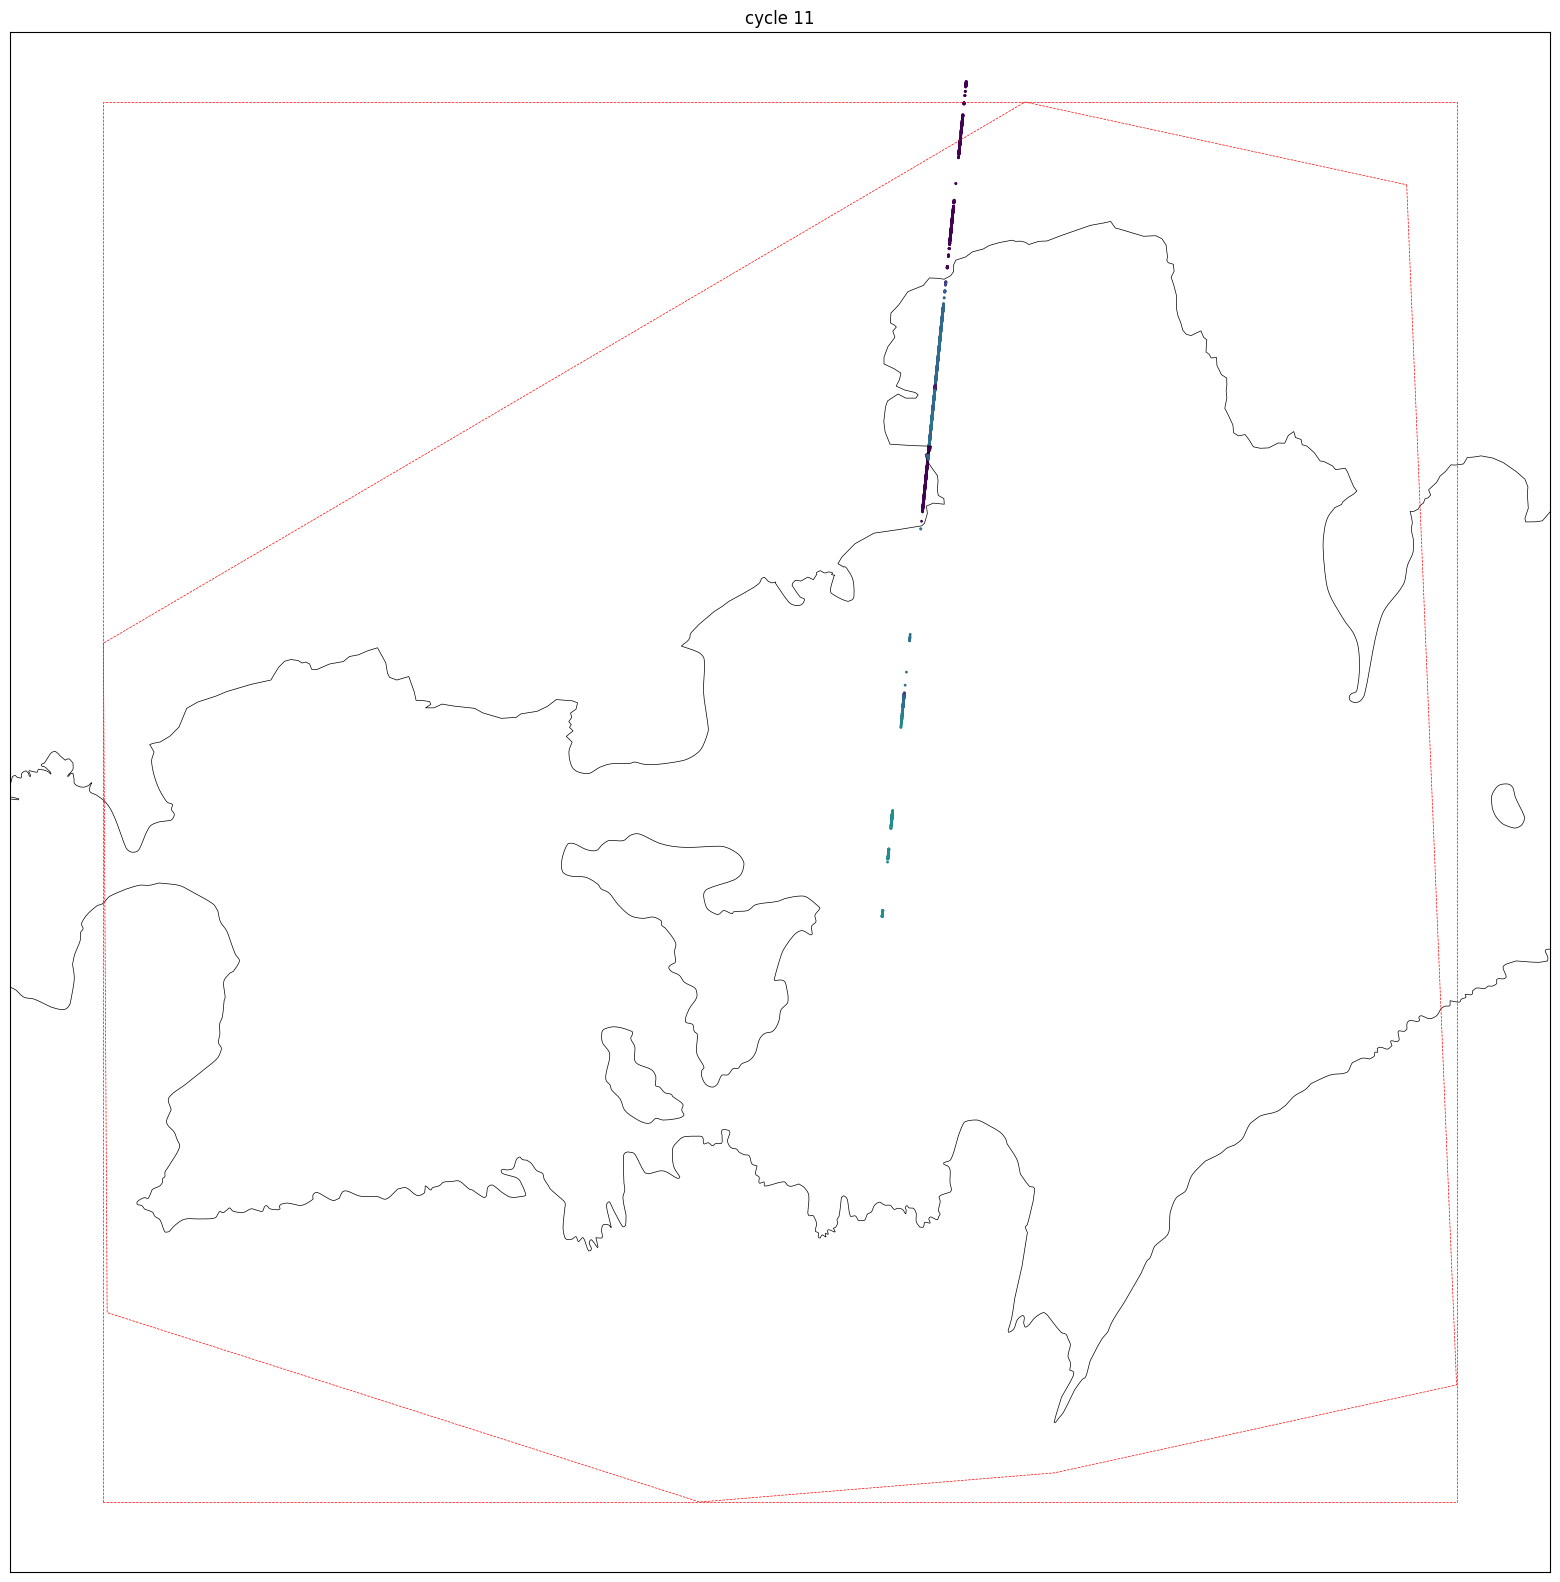

In [25]:
fig=plt.figure(figsize=(20,20))
ax1=fig.add_subplot(1,1,1)        

study_shelf_outline.boundary.plot(linestyle='-',color='k',ax=ax1,linewidth=0.5)
study_area_outline.boundary.plot(linestyle='--',color='r',ax=ax1,linewidth=0.5)

ax1.plot([study_area_xmin,study_area_xmin,study_area_xmax,study_area_xmax,study_area_xmin],\
        [study_area_ymin,study_area_ymax,study_area_ymax,study_area_ymin,study_area_ymin],\
        '--',color='r',linewidth=0.5)

for trace in range(121,122): #0,len(atl06_data_sub)):
    h_fb = np.array(atl06_data_sub["h"].iloc[trace] - atl06_data_sub["geoid"].iloc[trace])
    x = np.array(atl06_data_sub["x"].iloc[trace])
    y = np.array(atl06_data_sub["y"].iloc[trace])
    
    ax1.scatter(x,y,s=1,c=h_fb,vmin=0,vmax=100)
         
ax1.set_xlim(centerx-distbuffer,centerx+distbuffer)
ax1.set_ylim(centery-distbuffer,centery+distbuffer)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_title("cycle 11")

plt.show()

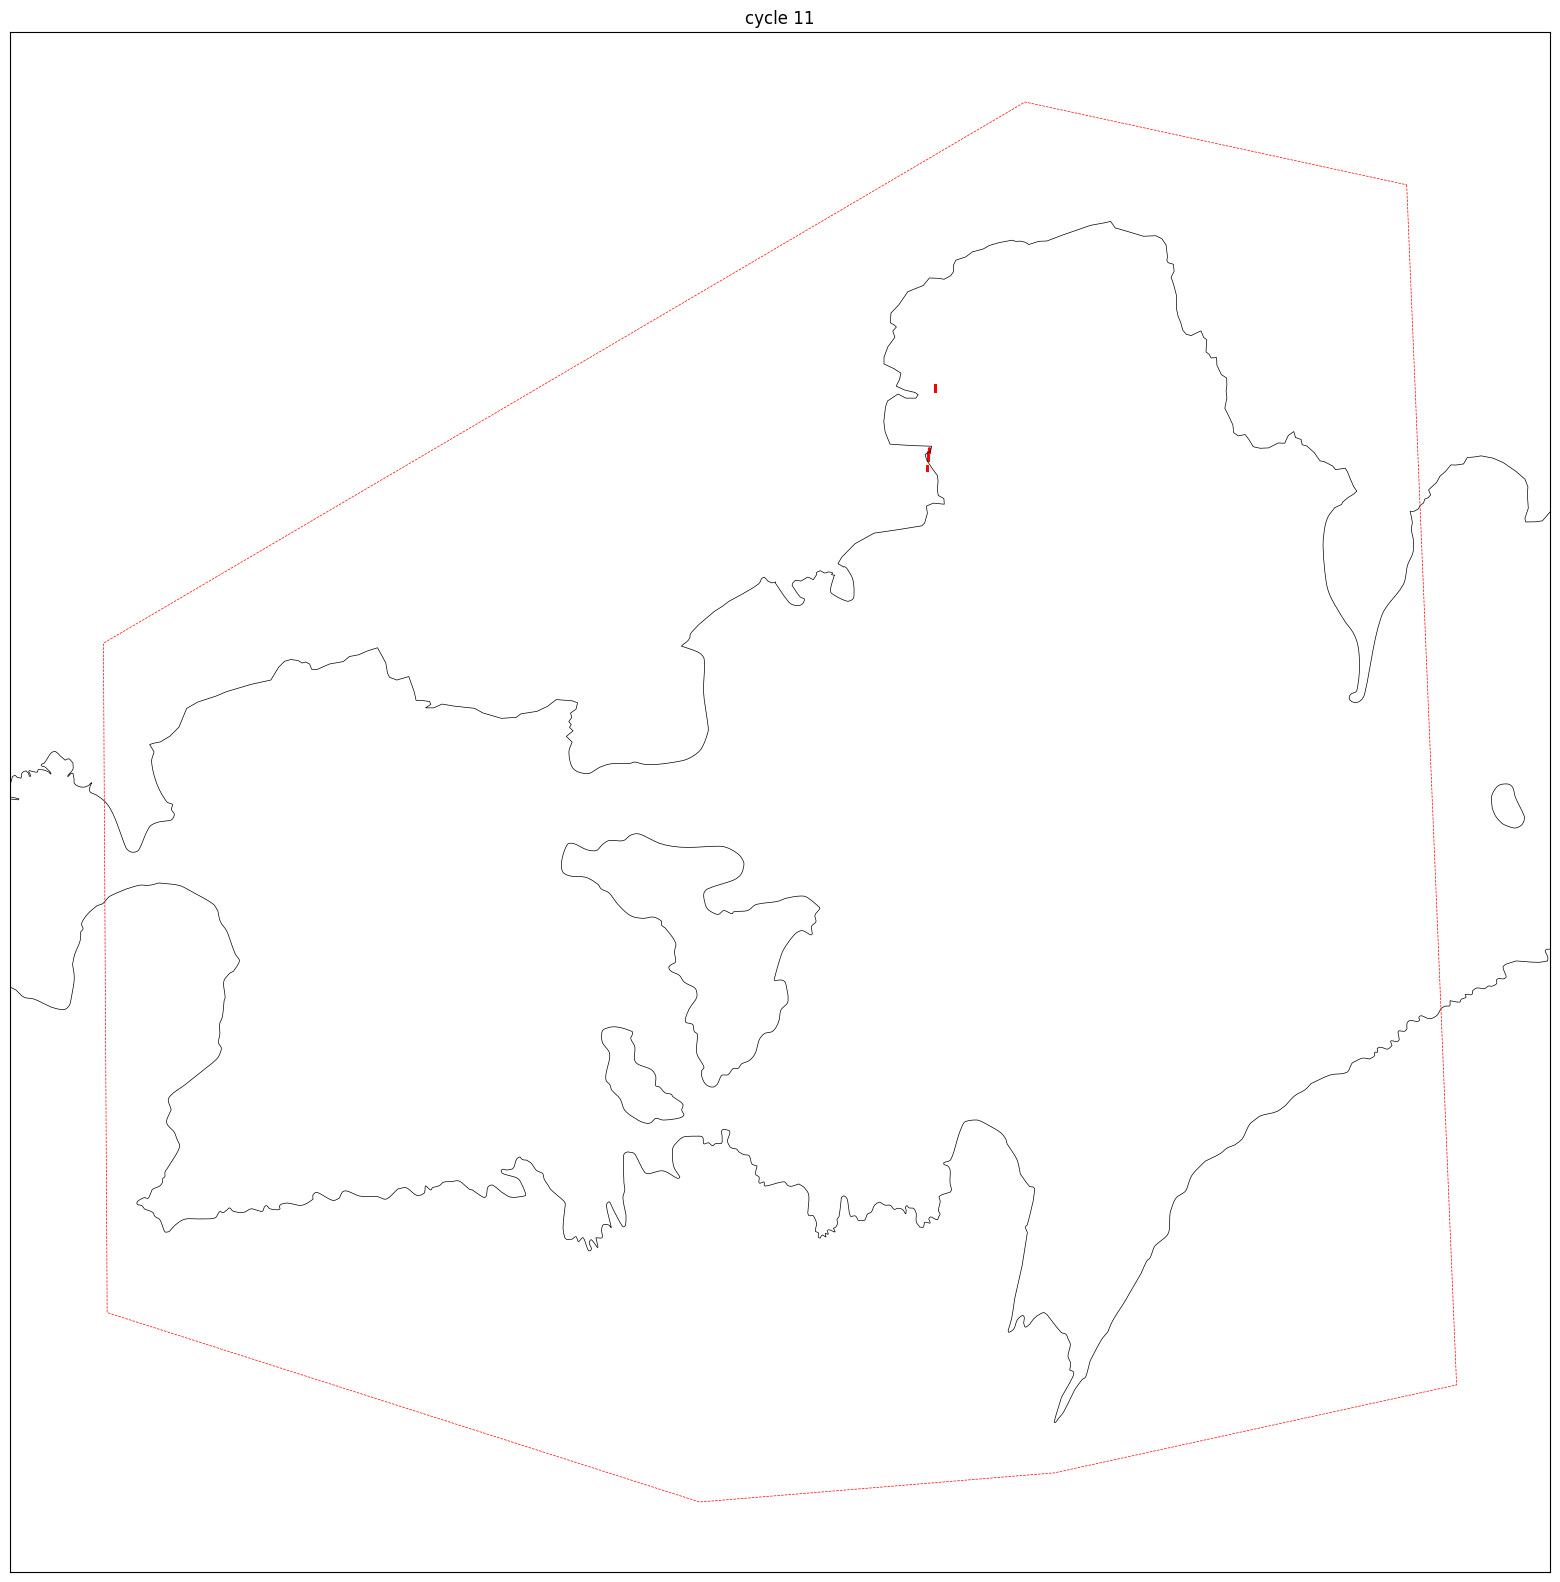

In [26]:
fig=plt.figure(figsize=(20,20))
ax3=fig.add_subplot(1,1,1)        

study_shelf_outline.boundary.plot(linestyle='-',color='k',ax=ax3,linewidth=0.5)
study_area_outline.boundary.plot(linestyle='--',color='r',ax=ax3,linewidth=0.5)

for trace_bin in range(0,len(bin_array)):
    x_mid = np.array(bin_array["x_mid"].iloc[trace_bin])
    y_mid = np.array(bin_array["y_mid"].iloc[trace_bin])
    r_bin = np.array(bin_array["bin"].iloc[trace_bin])
    
    x_min = np.array(bin_array["x_min"].iloc[trace_bin])
    y_min = np.array(bin_array["y_min"].iloc[trace_bin])
    r_bin = np.array(bin_array["bin"].iloc[trace_bin])


    ax3.scatter(x_mid[r_bin==0],y_mid[r_bin==0],s=1,c='r') #rift
    
ax3.set_xlim(centerx-distbuffer,centerx+distbuffer)
ax3.set_ylim(centery-distbuffer,centery+distbuffer)
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_xticklabels([])
ax3.set_yticklabels([])
ax3.set_title("cycle 11")

plt.show()

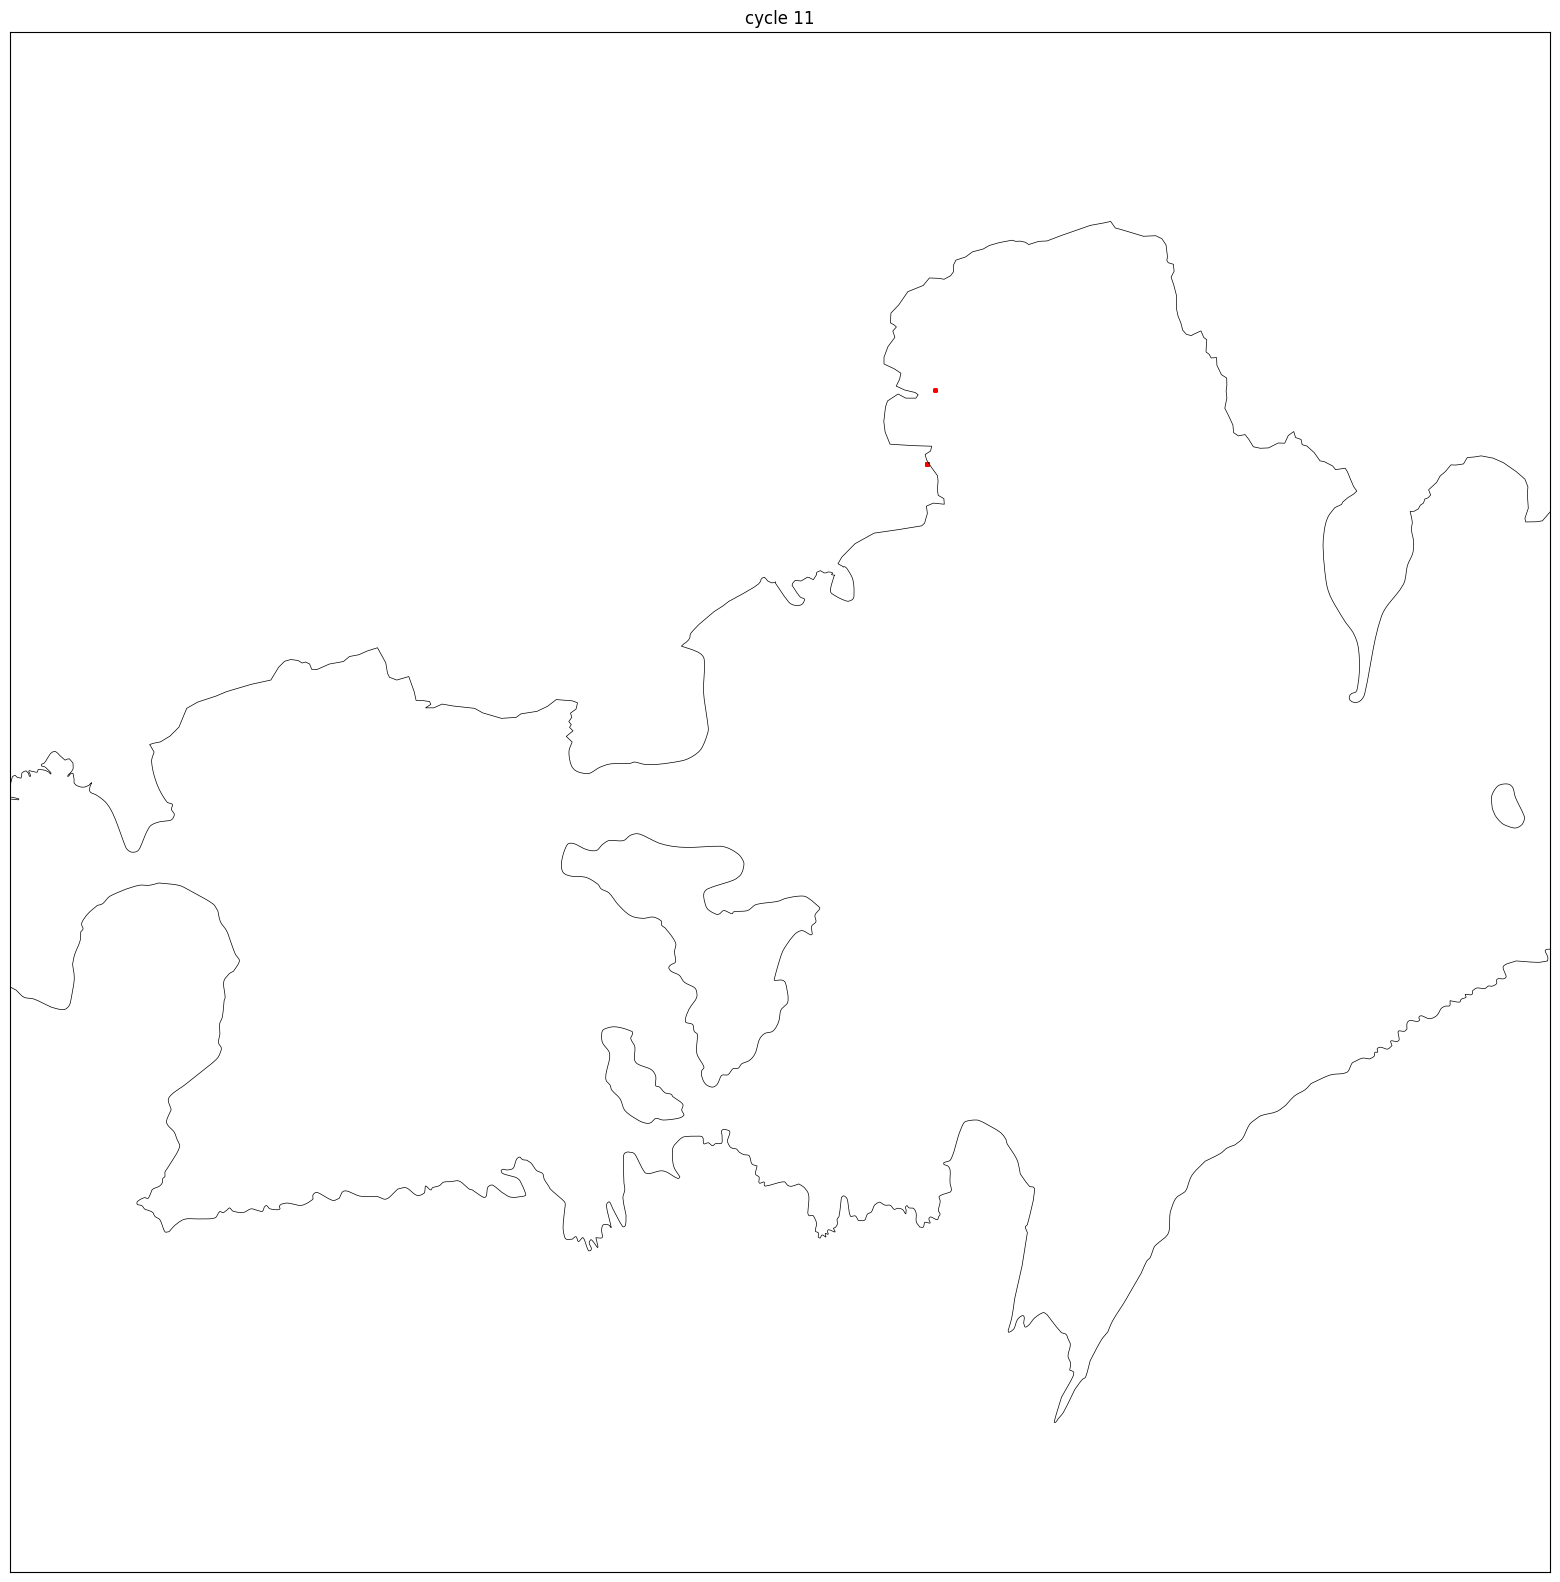

In [27]:
fig=plt.figure(figsize=(20,20))
ax3=fig.add_subplot(1,1,1)        

study_shelf_outline.boundary.plot(linestyle='-',color='k',ax=ax3,linewidth=0.5)

for trace_bin in range(0,len(bin_array)):
    x_mid = np.array(bin_array["x_mid"].iloc[trace_bin])
    y_mid = np.array(bin_array["y_mid"].iloc[trace_bin])
    r_bin = np.array(bin_array["bin"].iloc[trace_bin])
    
    x_min = np.array(bin_array["x_min"].iloc[trace_bin])
    y_min = np.array(bin_array["y_min"].iloc[trace_bin])
    r_bin = np.array(bin_array["bin"].iloc[trace_bin])

    ax3.scatter(x_min[r_bin==0],y_min[r_bin==0],s=5,c='r',alpha=0.5) #rift
    
ax3.set_xlim(centerx-distbuffer,centerx+distbuffer)
ax3.set_ylim(centery-distbuffer,centery+distbuffer)
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_xticklabels([])
ax3.set_yticklabels([])
ax3.set_title("cycle 11")

plt.show()

[-48751.6347417  -48753.64689954 -48755.6561232  ... -51910.1215096
 -51912.11143837 -51919.13963103] [2228126.39423911 2228106.50694922 2228086.61937417 ... 2196937.38782773
 2196917.51600427 2196847.97954329]


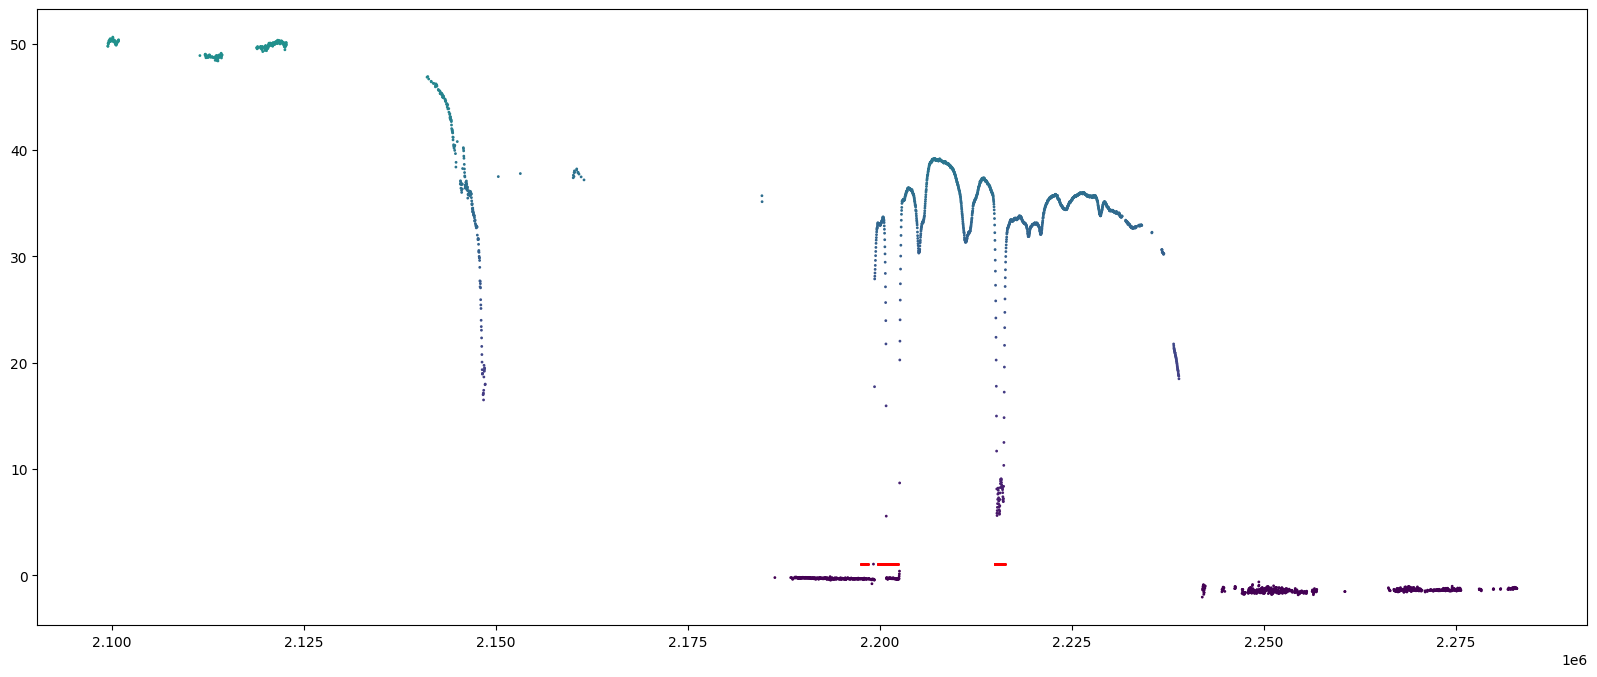

In [28]:
fig=plt.figure(figsize=(20,8))
ax1=fig.add_subplot(1,1,1)


for trace in range(121,122): #len(atl06_data_sub)):
    h_fb = np.array(atl06_data_sub["h"].iloc[trace] - atl06_data_sub["geoid"].iloc[trace])
    x = np.array(atl06_data_sub["x"].iloc[trace])
    y = np.array(atl06_data_sub["y"].iloc[trace])
    xyd = np.sqrt((x**2) + (y**2))
    
    ax1.scatter(xyd,h_fb,s=1,c=h_fb,vmin=0,vmax=100)
    
for trace_bin in range(0,len(bin_array)):
    x_mid = np.array(bin_array["x_mid"].iloc[trace_bin])
    y_mid = np.array(bin_array["y_mid"].iloc[trace_bin])
    r_bin = np.array(bin_array["bin"].iloc[trace_bin])
    xymid = np.sqrt((x_mid**2) + (y_mid**2))

    ax1.scatter(xymid[r_bin==0],np.ones(len(xymid))[r_bin==0],s=1,c='r') #rift
    print(x_mid,y_mid)

(2190000.0, 2225000.0)

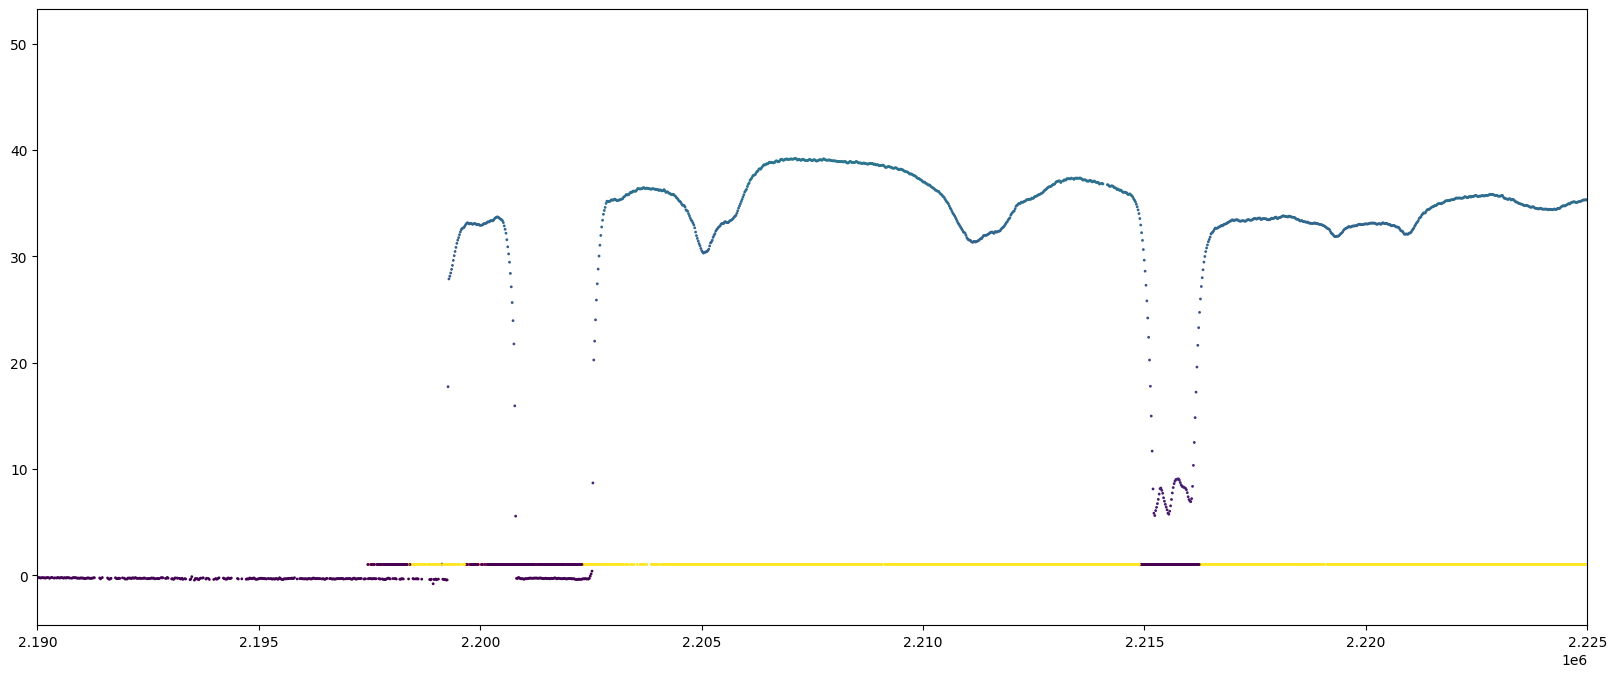

In [29]:
fig=plt.figure(figsize=(20,8))
ax1=fig.add_subplot(1,1,1)


for trace in range(121,122): #len(atl06_data_sub)):
    h_fb = np.array(atl06_data_sub["h"].iloc[trace] - atl06_data_sub["geoid"].iloc[trace])
    x = np.array(atl06_data_sub["x"].iloc[trace])
    y = np.array(atl06_data_sub["y"].iloc[trace])
    xyd = np.sqrt((x**2) + (y**2))
    
    ax1.scatter(xyd,h_fb,s=1,c=h_fb,vmin=0,vmax=100)
    
for trace_bin in range(0,len(bin_array)):
    x_mid = np.array(bin_array["x_mid"].iloc[trace_bin])
    y_mid = np.array(bin_array["y_mid"].iloc[trace_bin])
    r_bin = np.array(bin_array["bin"].iloc[trace_bin])
    xymid = np.sqrt((x_mid**2) + (y_mid**2))

    ax1.scatter(xymid[r_bin==0],np.ones(len(xymid))[r_bin==0],s=1,c='r') #rift
    ax1.scatter(xymid,np.ones(len(xymid)),s=1,c=r_bin) #rift

ax1.set_xlim([2190000,2225000])